In [82]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('russian_supermarket_prices.csv')

## Первичный анализ

In [23]:
df.head()


,product_name,product_category,brand,manufacturer,package_size,unit,old_price,new_price,catalogue_name,catalogue_date,year,source_url
0,"Молоко «Правильное» 3,2%-4%, 900 мл",Молоко,Правильное,NaN,900,мл,100.17,85.9,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,2022,https://proshoper.ru//actions/atak/moskva/175686/
1,"Бифилайф «Рузский» кисломолочный2,5 %, 250 г","Кефир, ряженка, тан, айран",Рузское молоко,Рузское молоко,250,г,108.64,69.9,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,2022,https://proshoper.ru//actions/atak/moskva/175686/
2,"Ряженка EkoNiva 4%, 1 л","Кефир, ряженка, тан, айран",EkoNiva,NaN,1000,мл,104.87,85.9,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,2022,https://proshoper.ru//actions/atak/moskva/175686/
3,"Кефир «Домик в деревне» лёгкий вечер 1%, 900 г","Кефир, ряженка, тан, айран",Домик в деревне,Вимм-Билль-Данн,900,г,85.04,67.9,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,2022,https://proshoper.ru//actions/atak/moskva/175686/
4,Сырок глазированный «Чудо Десерт» Три шоколада...,Сырок,Чудо,Вимм-Билль-Данн,40,г,41.78,31.9,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,2022,https://proshoper.ru//actions/atak/moskva/175686/


In [25]:
print(df.shape)

(44716, 12)


In [27]:
df.columns


Index(['product_name', 'product_category', 'brand', 'manufacturer',
       'package_size', 'unit', 'old_price', 'new_price', 'catalogue_name',
       'catalogue_date', 'year', 'source_url'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44716 entries, 0 to 44715
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      44716 non-null  object 
 1   product_category  44716 non-null  object 
 2   brand             43547 non-null  object 
 3   manufacturer      5149 non-null   object 
 4   package_size      44705 non-null  object 
 5   unit              36499 non-null  object 
 6   old_price         44716 non-null  float64
 7   new_price         44716 non-null  float64
 8   catalogue_name    44716 non-null  object 
 9   catalogue_date    44716 non-null  object 
 10  year              44716 non-null  int64  
 11  source_url        44716 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB


глянем что из себя представляют старые и новые цены на продукты

In [37]:
df['new_price'].describe()

count    44716.000000
mean       166.333318
std        236.074594
min          2.900000
25%         54.900000
50%         99.900000
75%        189.900000
max      19990.000000
Name: new_price, dtype: float64

In [39]:
df['old_price'].describe()

count    44716.000000
mean       240.131509
std        329.265596
min          3.440000
25%         77.140000
50%        145.000000
75%        278.992500
max      22990.000000
Name: old_price, dtype: float64

заметный разброс по ценам макс и мин
но в целом противоречий  с фактами скидок нет


In [41]:
df['year'].value_counts()

year
2020    18884
2021    15882
2022     8129
2019     1821
Name: count, dtype: int64

<Axes: >

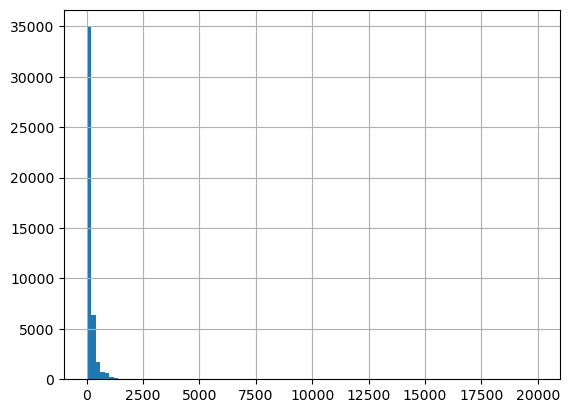

In [57]:
df['new_price'].hist(bins=100)

In [45]:
df['new_price'].value_counts()

new_price
99.9       1394
69.9       1340
59.9       1339
49.9       1288
39.9       1175
           ... 
2719.0        1
4699.0        1
644.0         1
354.0         1
19990.0       1
Name: count, Length: 941, dtype: int64

<Axes: >

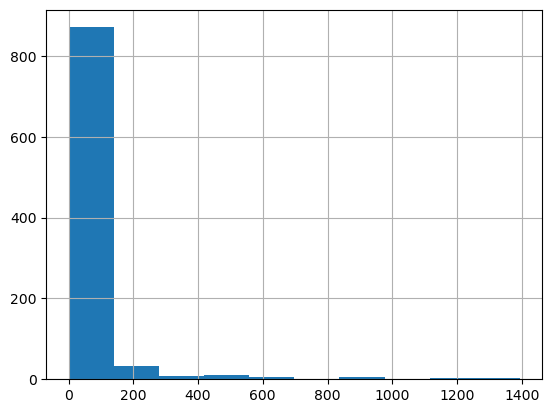

In [59]:
df_frequency = df['new_price'].value_counts()
df_frequency.hist()

# чистка данных

отбор числовых колонок:

In [72]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df[numeric_cols]

['old_price' 'new_price' 'year']


,old_price,new_price,year
0,100.17,85.9,2022
1,108.64,69.9,2022
2,104.87,85.9,2022
3,85.04,67.9,2022
4,41.78,31.9,2022
...,...,...,...
44711,650.00,369.0,2019
44712,980.00,439.0,2019
44713,980.00,439.0,2019
44714,1508.00,699.0,2019


отбор нечисловых колонок:

In [84]:
df_non_numeric = df.select_dtypes(exclude=[np.number])

non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
df[non_numeric_cols]

['product_name' 'product_category' 'brand' 'manufacturer' 'package_size'
 'unit' 'catalogue_name' 'catalogue_date' 'source_url']


,product_name,product_category,brand,manufacturer,package_size,unit,catalogue_name,catalogue_date,source_url
0,"Молоко «Правильное» 3,2%-4%, 900 мл",Молоко,Правильное,NaN,900,мл,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,https://proshoper.ru//actions/atak/moskva/175686/
1,"Бифилайф «Рузский» кисломолочный2,5 %, 250 г","Кефир, ряженка, тан, айран",Рузское молоко,Рузское молоко,250,г,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,https://proshoper.ru//actions/atak/moskva/175686/
2,"Ряженка EkoNiva 4%, 1 л","Кефир, ряженка, тан, айран",EkoNiva,NaN,1000,мл,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,https://proshoper.ru//actions/atak/moskva/175686/
3,"Кефир «Домик в деревне» лёгкий вечер 1%, 900 г","Кефир, ряженка, тан, айран",Домик в деревне,Вимм-Билль-Данн,900,г,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,https://proshoper.ru//actions/atak/moskva/175686/
4,Сырок глазированный «Чудо Десерт» Три шоколада...,Сырок,Чудо,Вимм-Билль-Данн,40,г,Сезонный каталог Атак «Недельный каталог»,с 17 по 23 марта 2022,https://proshoper.ru//actions/atak/moskva/175686/
...,...,...,...,...,...,...,...,...,...
44711,Стиральный порошок для цветного белья «Алое Ве...,Стиральный порошок,Frosch,NaN,1350,г,Каталог акций «Ашан»\n — Москва,с 11 по 20 ноября 2019,https://proshoper.ru//actions/ashan/moskva/85675/
44712,"Стиральный порошок автомат «100 пятен» BiMax, ...",Стиральный порошок,BiMax,NaN,6000,г,Каталог акций «Ашан»\n — Москва,с 11 по 20 ноября 2019,https://proshoper.ru//actions/ashan/moskva/85675/
44713,"Стиральный порошок «Color» BiMax, 6 кг",Стиральный порошок,Color,NaN,6000,г,Каталог акций «Ашан»\n — Москва,с 11 по 20 ноября 2019,https://proshoper.ru//actions/ashan/moskva/85675/
44714,Набор для лепки Сумасшедшие прически Play-Doh,Набор,Play,NaN,Набор дя епки Сумасшедшие прически Play-Doh,NaN,Каталог акций «Ашан»\n — Москва,с 11 по 20 ноября 2019,https://proshoper.ru//actions/ashan/moskva/85675/


<Axes: >

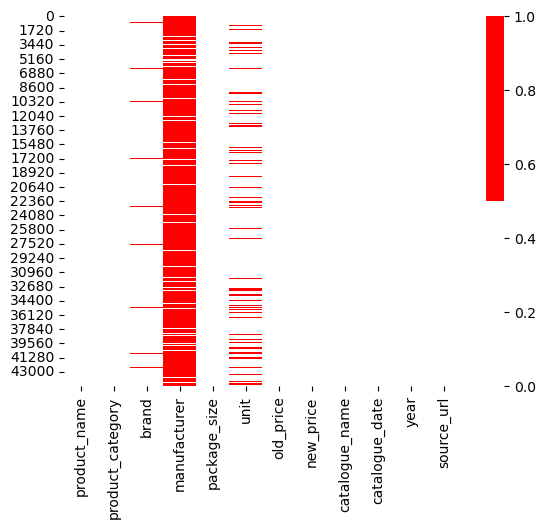

In [97]:
import seaborn as sns
columns = df.columns
colours = ['white','red']
sns.heatmap(df[columns].isnull(), cmap=sns.color_palette(colours))

In [109]:
for columns in df.columns:
    missing = np.mean(df[columns].isnull())
    print('{} - {}%'.format(columns, round(missing*100)))

product_name - 0%
product_category - 0%
brand - 3%
manufacturer - 88%
package_size - 0%
unit - 18%
old_price - 0%
new_price - 0%
catalogue_name - 0%
catalogue_date - 0%
year - 0%
source_url - 0%


<Axes: >

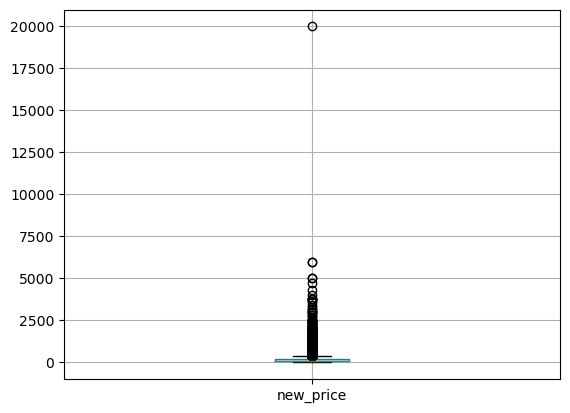

In [111]:
df.boxplot(column=['new_price'])

In [154]:
df_max = df['new_price'].max()
print(df_max)

5990.0


In [156]:
df.loc[df['new_price'] == df_max]

,product_name,product_category,brand,manufacturer,package_size,unit,old_price,new_price,catalogue_name,catalogue_date,year,source_url
15130,"Телевизор Asano 32LH1010T 32"", черный",Телевизор,Asano,NaN,черный,NaN,7490.0,5990.0,Каталог акций «Атак»\n — Москва,с 1 по 10 марта 2020,2020,https://proshoper.ru//actions/atak/moskva/94250/
42859,"Телевизор Asano 32LH1010T 32"", черный",Телевизор,Asano,NaN,черный,NaN,7490.0,5990.0,Каталог акций «Ашан»\n — Москва,с 1 по 10 марта 2020,2020,https://proshoper.ru//actions/ashan/moskva/94249/


вероятно, не самый подходящий товар в выборке

In [158]:
df = df.drop(index=40908)
print(df['new_price'].max())

KeyError: '[40908] not found in axis'

In [160]:
df.loc[df['new_price'] == df_max]

,product_name,product_category,brand,manufacturer,package_size,unit,old_price,new_price,catalogue_name,catalogue_date,year,source_url
15130,"Телевизор Asano 32LH1010T 32"", черный",Телевизор,Asano,NaN,черный,NaN,7490.0,5990.0,Каталог акций «Атак»\n — Москва,с 1 по 10 марта 2020,2020,https://proshoper.ru//actions/atak/moskva/94250/
42859,"Телевизор Asano 32LH1010T 32"", черный",Телевизор,Asano,NaN,черный,NaN,7490.0,5990.0,Каталог акций «Ашан»\n — Москва,с 1 по 10 марта 2020,2020,https://proshoper.ru//actions/ashan/moskva/94249/


удалим все телевизорыи

In [189]:
df = df.drop(df[df['product_category'].str.contains('Телевизор',na=False)].index)
print(df.shape)

(44713, 12)


# ищем дубли

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44716 entries, 0 to 44715
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      44716 non-null  object 
 1   product_category  44716 non-null  object 
 2   brand             43547 non-null  object 
 3   manufacturer      5149 non-null   object 
 4   package_size      44705 non-null  object 
 5   unit              36499 non-null  object 
 6   old_price         44716 non-null  float64
 7   new_price         44716 non-null  float64
 8   catalogue_name    44716 non-null  object 
 9   catalogue_date    44716 non-null  object 
 10  year              44716 non-null  int64  
 11  source_url        44716 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.1+ MB


In [191]:
key = ['product_name', 'product_category', 'old_price', 'new_price', 'year']
df.fillna(-999).groupby(key)['source_url'].count().sort_values(ascending=False)

product_name                                                                                    product_category          old_price  new_price  year
Сырок глазированный «Ростагроэкспорт» творожный с ароматом ванили массовая доля жира 20%, 45 г  Сырок                     18.49      13.9       2020    6
Нектар «Добрый» уголки России, овощной урожай, 1 л                                              Сок                       104.00     75.0       2020    6
Трусики для мальчиков Huggies 4 (9-14 кг), 52 шт                                                Трусики                   1326.00    835.0      2020    6
Трусики для мальчиков Huggies 3 (7-11 кг), 58 шт                                                Трусики                   1326.00    835.0      2020    6
Трусики для девочек Huggies 6 (16-22 кг), 44 шт                                                 Трусики                   1326.00    835.0      2020    6
                                                                                 

In [193]:
df_no_dup = df.drop_duplicates(subset=key)
print(df.shape)
print(df_no_dup.shape)

(44713, 12)
(32174, 12)


<Axes: >

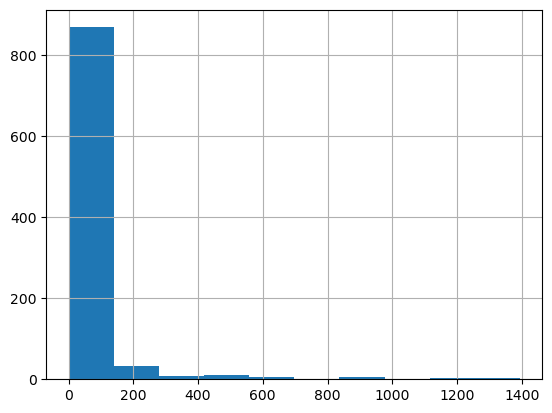

In [195]:
df_frequency = df['new_price'].value_counts()
df_frequency.hist()


<Axes: >

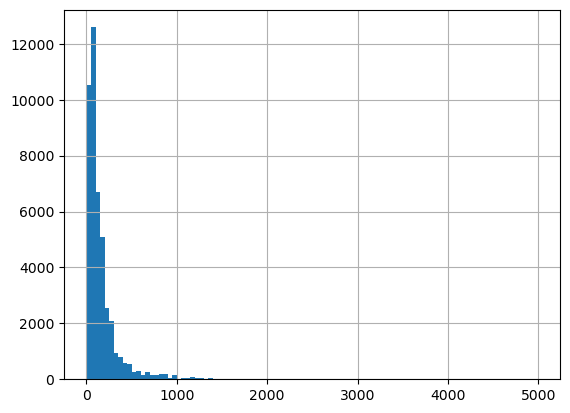

In [197]:
df['new_price'].hist(bins=100)


<Axes: >

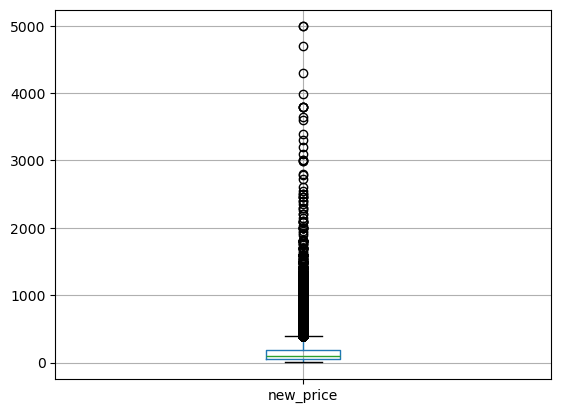

In [201]:
df.boxplot(column=['new_price'])

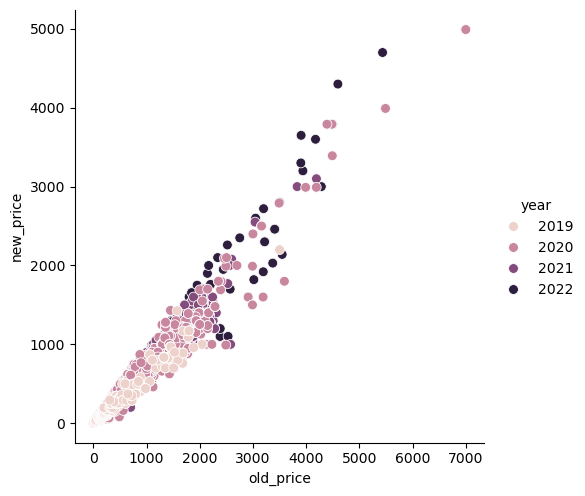

In [246]:

sns.pairplot(
    df,
    x_vars=['old_price'],
    y_vars=['new_price'],
    hue = 'year',
    height = 5,
    plot_kws = {'s': 50}
)

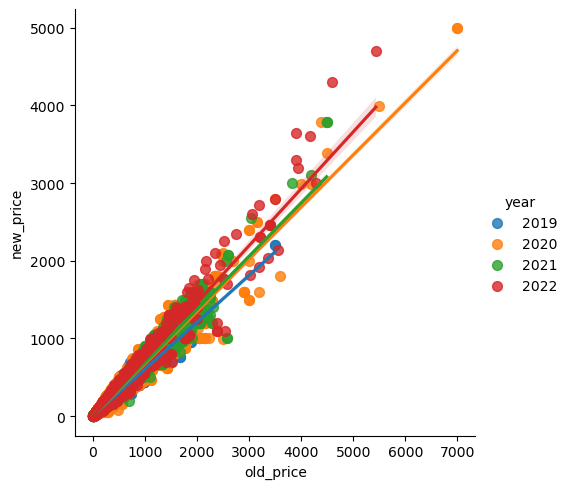

In [248]:
sns.lmplot(
    data=df,
    x='old_price',
    y='new_price',
    hue='year',
    height=5,
    scatter_kws={'s': 50}  # Размер маркеров
)
